## PCA for Chronic Kidney Disease Data Set 

from the site of [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease), 
Center for Machine Learning and Intelligent Systems

Number of Instances: __400__ 
Number of Attributes: __25__



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import assignment2_helper as helper
matplotlib.style.use('ggplot')

from sklearn.decomposition import PCA

## Part I: PCA after filtering the data by three blood components

### Read Kidney Dicease Data

Any time you transform your data, you lose the column header names.
This actually makes complete sense. There are essentially two types
of transformations,  those that change the scale of your features,
and those that change your features entire. Changing the scale would
be like changing centimeters to inches. Changing the features would
be like using PCA to reduce 300 columns to 30. 

In [2]:
df = pd.read_csv("kidney_disease.csv", sep = '\t')
df.shape

(400, 26)

In [3]:
# Number of rows: 400
# print("numb.of.rows: ", df.count())  
# Type of df: <class 'pandas.core.frame.DataFrame'>
# print('type of df: ', type(df))

### Data Attributes:
* age	-	age	
* bp	-	blood pressure 
* sg	-	specific gravity 
* al	- albumin 
* su	-	sugar 
* rbc	-	red blood cells 
* pc	-	pus cell 
* pcc	-	pus cell clumps 
* ba	-	bacteria 
* bgr	-	blood glucose random 
* bu	-	blood urea 
* sc	-	serum creatinine 
* sod	-	sodium 
* pot	-	potassium 
* hemo	-	hemoglobin 
* pcv	-	packed cell volume 
* wc	-	white blood cell count 
* rc	-	red blood cell count 
* htn	-	hypertension 
* dm	-	diabetes mellitus 
* cad	-	coronary artery disease 
* appet	-	appetite 
* pe	-	pedal edema 
* ane	-	anemia 
* classification	-	class

### Drop all rows that have any nans

In [4]:
df = df.dropna(how = 'any')
print("After NaNs are dropped the number of Rows: ", df.shape) # df.count())

After NaNs are dropped the number of Rows:  (158, 26)


### Create color coded labels
Attribute class has two possible values: __ckd__ (Chronic kidney disease) and __notckd__.
Create some color coded labels; the actual label feature
will be removed prior to executing PCA, since it's unsupervised.
You're only labeling by color so you can see the effects of PCA.

In [5]:
labels = ['red' if i=='ckd' else 'green' for i in df.classification]

### Filtering data by white and red blood cells and blood glucose
After filtering we get the following types of attributes
* bgr  float64
* rc   object
* wc   object

We would like to convert the attributes of type 'object' to 'numeric'.
Adter convert all the types are 'numeric':

* bgr    float64
* rc     float64
* wc       int64

In [6]:
# Filtering by 'blood glucose random', 'red blood cell count' and 'white blood cell count'
print('type(df): ', type(df))
df = df[['bgr', 'rc', 'wc']] 
print(df.shape)
print(df.count())
#-print("types before convert:")
#-print(df.dtypes)
df.wc = pd.to_numeric(df.wc, errors='coerce')
df.rc = pd.to_numeric(df.rc, errors='coerce')
#-print("types after convert:")
df.dtypes

type(df):  <class 'pandas.core.frame.DataFrame'>
(158, 3)
bgr    158
rc     158
wc     158
dtype: int64


bgr    float64
rc     float64
wc       int64
dtype: object

In [7]:
print(df.shape)
print(df.describe())

(158, 3)
              bgr          rc            wc
count  158.000000  158.000000    158.000000
mean   131.341772    4.891772   8475.949367
std     64.939832    1.019364   3126.880181
min     70.000000    2.100000   3800.000000
25%     97.000000    4.500000   6525.000000
50%    115.500000    4.950000   7800.000000
75%    131.750000    5.600000   9775.000000
max    490.000000    8.000000  26400.000000


In [8]:
print(df.head()) # 5 first
print(df.corr()) # correlation

      bgr   rc     wc
3   117.0  3.9   6700
9    70.0  3.7  12100
11  380.0  3.8   4500
14  157.0  2.6  11000
20  173.0  3.2   9200
          bgr        rc        wc
bgr  1.000000 -0.418085  0.212093
rc  -0.418085  1.000000 -0.272390
wc   0.212093 -0.272390  1.000000


In [9]:
print(df.loc[0:100])

      bgr   rc     wc
3   117.0  3.9   6700
9    70.0  3.7  12100
11  380.0  3.8   4500
14  157.0  2.6  11000
20  173.0  3.2   9200
22   95.0  3.4   6900
27  264.0  4.1   9600
48   70.0  3.5  18900
58  253.0  4.3   7200
71  163.0  3.2  14600
74  129.0  3.4   6400
76  133.0  4.0   6200
84   76.0  2.1   3800
90  280.0  4.2   9800
91  210.0  5.6  12500
92  219.0  3.6   5600
93  295.0  3.2   7000


In [10]:
def PCA_scale(df, scaleFeatures):
    if scaleFeatures: 
        df = helper.scaleFeatures(df)

    pca = PCA(n_components=2)
    pca.fit(df)
    PCA(copy=True,  n_components=2, whiten=False)
    T = pca.transform(df)

    print("Tshape: ", T.shape)

    fig, ax = plt.subplots()
    ax.set_title('PCA')
    ax.scatter(T[:,0], T[:,1], c='blue', marker='.', alpha=0.75)

    ax = helper.drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
    T = pd.DataFrame(T)
    T.columns = ['component1', 'component2']
    T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)
    plt.show()


Tshape:  (158, 2)


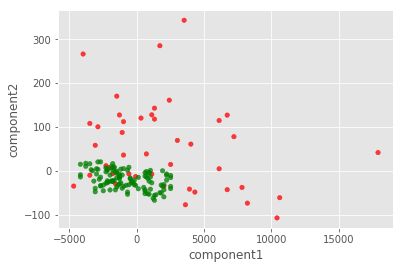

In [11]:
PCA_scale(df, False)

New Variances:
 bgr    1.006369
rc     1.006369
wc     1.006369
dtype: float64
New Describe:
                 bgr            rc            wc
count  1.580000e+02  1.580000e+02  1.580000e+02
mean  -9.755075e-17  1.068063e-16  9.345548e-17
std    1.003180e+00  1.003180e+00  1.003180e+00
min   -9.475974e-01 -2.747446e+00 -1.500159e+00
25%   -5.305059e-01 -3.855519e-01 -6.259123e-01
50%   -2.447210e-01  5.730335e-02 -2.168611e-01
75%    6.306235e-03  6.969831e-01  4.167672e-01
max    5.540492e+00  3.058878e+00  5.750474e+00
Tshape:  (158, 2)
Features by importance:
 [(3.9998071556884818, 'wc'), (3.2588876641210898, 'bgr'), (3.009752752998361, 'rc')]


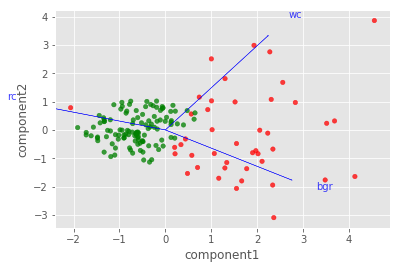

In [12]:
PCA_scale(df, True)

## Part II: PCA after filtering the data by 5 components

In [13]:
df = pd.read_csv("kidney_disease.csv", sep = '\t')
df.shape
df = df.dropna(how = 'any')
labels = ['red' if i=='ckd' else 'green' for i in df.classification]

print('type(df): ', type(df))
# Filtering the data by 5 components
df = df[['bgr', 'rc', 'wc', 'su', 'sod']] 
print(df.shape)
#print(df.count())
#print('df.dtypes before pd.to_numeric:\n', df.dtypes)
df.wc = pd.to_numeric(df.wc, errors='coerce')
df.rc = pd.to_numeric(df.rc, errors='coerce')
#print('df.dtypes after pd.to_numeric: \n', df.dtypes)

print(df.describe()) # statistics

# 5 first
print(df.corr()) # correlation

type(df):  <class 'pandas.core.frame.DataFrame'>
(158, 5)
              bgr          rc            wc          su         sod
count  158.000000  158.000000    158.000000  158.000000  158.000000
mean   131.341772    4.891772   8475.949367    0.253165  138.848101
std     64.939832    1.019364   3126.880181    0.813397    7.489421
min     70.000000    2.100000   3800.000000    0.000000  111.000000
25%     97.000000    4.500000   6525.000000    0.000000  135.000000
50%    115.500000    4.950000   7800.000000    0.000000  139.000000
75%    131.750000    5.600000   9775.000000    0.000000  144.000000
max    490.000000    8.000000  26400.000000    5.000000  150.000000
          bgr        rc        wc        su       sod
bgr  1.000000 -0.418085  0.212093  0.730050 -0.284968
rc  -0.418085  1.000000 -0.272390 -0.377726  0.465125
wc   0.212093 -0.272390  1.000000  0.201000 -0.176238
su   0.730050 -0.377726  0.201000  1.000000 -0.242491
sod -0.284968  0.465125 -0.176238 -0.242491  1.000000


Tshape:  (158, 2)


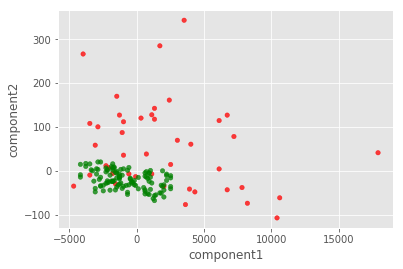

In [14]:
PCA_scale(df, False)

New Variances:
 bgr    1.006369
rc     1.006369
wc     1.006369
su     1.006369
sod    1.006369
dtype: float64
New Describe:
                 bgr            rc            wc            su           sod
count  1.580000e+02  1.580000e+02  1.580000e+02  1.580000e+02  1.580000e+02
mean  -9.755075e-17  1.068063e-16  9.345548e-17 -2.108018e-18  8.119384e-16
std    1.003180e+00  1.003180e+00  1.003180e+00  1.003180e+00  1.003180e+00
min   -9.475974e-01 -2.747446e+00 -1.500159e+00 -3.122333e-01 -3.730148e+00
25%   -5.305059e-01 -3.855519e-01 -6.259123e-01 -3.122333e-01 -5.154386e-01
50%   -2.447210e-01  5.730335e-02 -2.168611e-01 -3.122333e-01  2.034626e-02
75%    6.306235e-03  6.969831e-01  4.167672e-01 -3.122333e-01  6.900774e-01
max    5.540492e+00  3.058878e+00  5.750474e+00  5.854375e+00  1.493755e+00
Tshape:  (158, 2)
Features by importance:
 [(4.033233079200189, 'su'), (4.0286874782158755, 'bgr'), (3.5171649246265275, 'rc'), (3.394214475855159, 'sod'), (2.71927111464831, 'wc')]


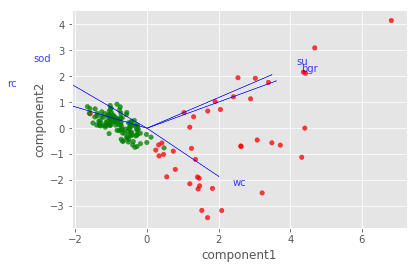

In [15]:
PCA_scale(df, True)